# Павлюков 501И
## 2.1. Непараметрическая регрессия. Формула Надарая – Ватсона
- Реализовать метод ядерного сглаживания Надарая – Ватсона с гауссовским и квартическим ядрами.
- Предоставить возможность настраивать все параметры алгоритма.
- Сравнить SSE для гауссовского и квартического ядер.
- Сделать выводы.

In [1]:
import numpy as np # массивы
import matplotlib.pyplot as plt#рисует графики
from matplotlib.colors import ListedColormap#карта цветов
from sklearn.datasets import make_regression as mr # функция для создания регрессионной выборки
import random # набор функций для создания псевдослучайных данных
from math import exp
from sklearn.model_selection import LeaveOneOut as LOO # дробит выборку на все возможные варианты
                                                       # без одного тестового элемента

In [2]:
def make_1d_regression(f,n_samples,Xrange,deviation):
    "Создает n_samples случайных признаков в диапазоне Xrange = [X_min,X_max]\nВычисляет значения функции y = f(X)\nдобавляет случайную поправку к функции в диапазоне [-1*deviation,deviation]\nВозвращает (X,y)"
    X = np.array([random.uniform(Xrange[0],Xrange[1]) for i in range(n_samples)])
    y = np.array([f(X[i]) + random.uniform(-1*deviation,deviation) for i in range(n_samples)])
    return (X,y)

In [3]:
# зададим диапазон X и создадим данные имитирующие реальные небрежные нанесения,
# например точек квадратичной функции на график
Xrange = [0., 5.]
fan=(lambda x: x**2)
X,y = make_1d_regression(fan,50,Xrange,5)

In [4]:
# первое, что понадобится это функция расстояния

def p(x1,x2):
    "Декартово расстояние в 1-мерном пространстве"
    return abs(x2-x1)
# второе это ядро
def KG(z):
    "Гауссово ядро, коэфициент 1/sqrt(2*pi) опущен"
    return np.array((list(map(exp,(-1.*z*z/2.)))))
def KQ(z):
    "Квартическое оно же биквадратное ядро, коэфициент 15/16 опущен"
    return np.array(list(map((lambda x: (1-x*x)**2 if x<1 else 0),z)))

In [5]:
# регрессор по Надаря-Ватсону
def NV(X,y_treyning,X_treyning,p,h,K):
    f=(lambda z: K(np.array(list(map((lambda m: p(m,z)/h),X_treyning)))))
    Xt = np.array([t for t in X])
    for i in range(len(Xt)):
        z=f(Xt[i])
        Xt[i]=(y_treyning * z).sum()/z.sum()
    return Xt

In [6]:
def Q(X,y,p,h,K):
    return sum((y-NV(X,y,X,p,h,K))**2)/len(X)

In [7]:
def Er(X,y,p,h,K):
    err=0
    for train_index, test_index in LOO().split(X): #разбиваем индексы на тестовые и обучающие
        err += (y[test_index] - NV(X[test_index],y[train_index],X[train_index],p,h,K))**2
    return err[0]

In [8]:
k=0.1
kk1=k
s1=Er(X,y,p,k,KG)
while k<=5:
    ss=Er(X,y,p,k,KG)
    if ss<s1:
        s1=ss
        kk1=k
    k=k+0.01
k=0.4
kk2=k
s2=Er(X,y,p,k,KQ)
while k<=5:
    ss=Er(X,y,p,k,KQ)
    if ss<s2:
        s2=ss
        kk2=k
    k=k+0.01

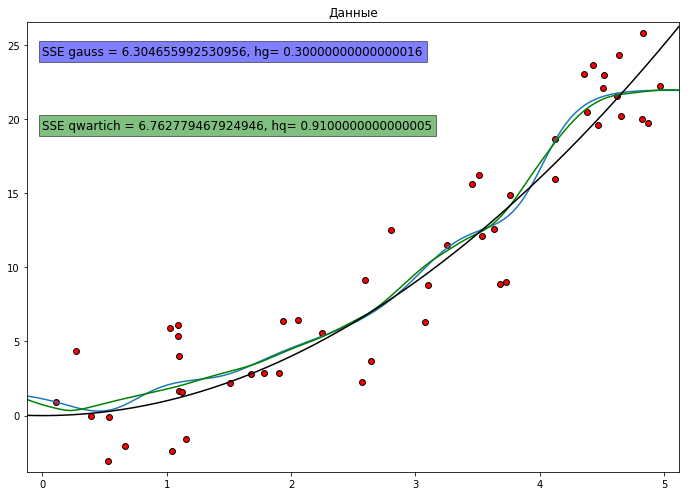

In [19]:
hg = kk1 # 0.37
hq = kk2 # 1.05
h = 0.01 # шаг сетки

# Для графического представления, найдем максимальные и минимальные значения признаков
# и увеличим(уменьшим) их на определенные числа
r = 5.
xp = r*(Xrange[1] - Xrange[0])/100
yp = r*(y.max() - y.min())/100
x_min, x_max = min(X.min(),Xrange[0])-xp, max(X.max(),Xrange[1])+xp
y_min, y_max = y.min()-yp, y.max()+yp
# получим сетку
xx = np.arange(x_min, x_max, h)
# посчитаем данные для графика
yy1 = NV(xx,y,X,p,hg,KG)
yy2 = NV(xx,y,X,p,hq,KQ)
ff = np.array(list(map(fan,xx)))

fig, axs = plt.subplots(nrows=1, ncols=1, sharex=False) # создаем фигуру
fig.set_size_inches(29.7 / 2.54 , 21. / 2.54) # установить размер изображения формат А4, альбомная ориентация

axs.plot(xx,yy1) # по умолчанию голубой
axs.plot(xx,yy2,c='green')
axs.plot(xx,ff,c='black')
axs.scatter(X, y, c='red', edgecolor='k', s=35) # наносим известные элементы на график
# установка ограничений на оси, немного обрежем по краям график, чтобы увеличиласть область с известными ответами
axs.set_xlim(x_min+0.5*xp, x_max-0.5*xp)
axs.set_ylim(y_min+0.5*yp, y_max-0.5*yp)
# добавление заголовка
axs.set_title("Данные")

axs.text(0, 25, "SSE gauss = "+str(Q(X,y,p,hg,KG))+", hg= "+str(hg), bbox=dict(facecolor='blue', alpha=0.5),fontsize=12, horizontalalignment='left', verticalalignment='top')
axs.text(0, 20, "SSE qwartich = "+str(Q(X,y,p,hq,KQ))+", hq= "+str(hq), bbox=dict(facecolor='green', alpha=0.5),fontsize=12, horizontalalignment='left', verticalalignment='top')
plt.show()
print()